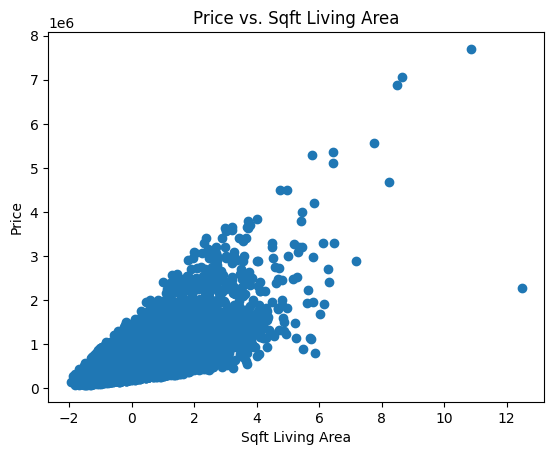

Mean Squared Error: 73565033077.05386
Root Mean Squared Error: 271228.74677484663
R-squared: 0.5139560812660038
Coefficients: [ 590207.71084217   28208.27869581 -323249.40601675  -50220.44207011
  -46240.36622034   13397.43464341 -113140.31255483  139325.21985592]


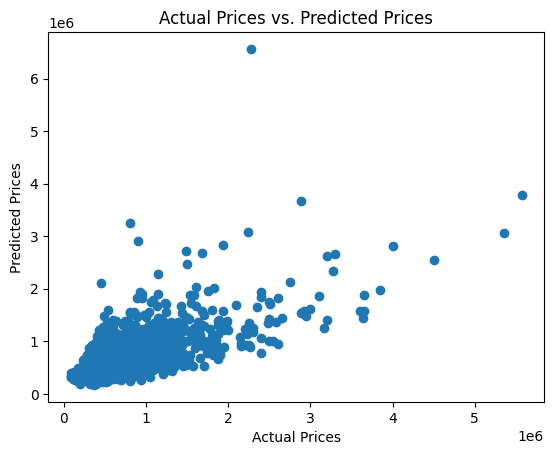

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge  # Regularized linear regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv("houseprice_data.csv")

# Data Preprocessing
# Handle missing data (if needed)
# Convert categorical variables to numerical (if needed, using one-hot encoding)

# Feature Engineering
# Let's create a few additional features and scale the numerical features for regularization
data['sqft_living_sqrt'] = np.sqrt(data['sqft_living'])
data['sqft_lot_sqrt'] = np.sqrt(data['sqft_lot'])
data['bedrooms_squared'] = data['bedrooms'] ** 2
data['bathrooms_squared'] = data['bathrooms'] ** 2

# Scaling numerical features
scaler = StandardScaler()
numerical_features = ['sqft_living', 'sqft_lot', 'sqft_living_sqrt', 'sqft_lot_sqrt', 'bedrooms', 'bedrooms_squared', 'bathrooms', 'bathrooms_squared']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Data Exploration
# Visualize the data and relationships between features and target variable
# For example, let's visualize the relationship between sqft_living and price
plt.scatter(data['sqft_living'], data['price'])
plt.xlabel('Sqft Living Area')
plt.ylabel('Price')
plt.title('Price vs. Sqft Living Area')
plt.show()

# Feature Selection
# You can use correlation or other feature selection methods to choose relevant features

# Split the data into train and test sets
X = data[['sqft_living', 'sqft_lot', 'sqft_living_sqrt', 'sqft_lot_sqrt', 'bedrooms', 'bedrooms_squared', 'bathrooms', 'bathrooms_squared']]  # Features
y = data['price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Development with Regularization
model = Ridge(alpha=1.0)  # Ridge regression with regularization (you can adjust alpha)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

# Model Interpretation
# Print model coefficients
print("Coefficients:", model.coef_)

# Visualize the predicted vs. actual prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()
